## Nama : Muhammad Dean Fahreza
## NPM : 50420812
## Kelas : 2IA09

In [1]:
# mengimport library
import pandas as pd
import numpy as np

In [2]:
# mengimport dataset
data = pd.read_csv('https://gitlab.com/andreass.bayu/file-directory/-/raw/main/new_concreate.csv')

In [3]:
# melihat lima data awal dalam dataset
data.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,NaN,203.5,NaN,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,NaN,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,NaN,228.0,NaN,932.0,670.0,28,45.85
4,154.8,183.4,NaN,193.3,9.1,1047.4,696.7,28,18.29


# Instruksi Tugas

### 1. Rubahlah fitur cement menjadi fitur target class yang ingin Anda prediksi, dengan nilai `fitur > 281` merupakan `kelas 1` dan `< 281` menjadi `nilai 0`. Berapa akurasi model dan `nilai k` untuk skenario ini?

In [4]:
# mengimport library tambahan untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='cement', ylabel='count'>

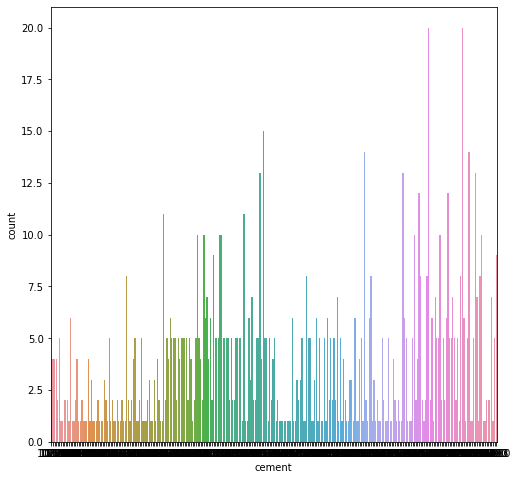

In [5]:
# membuat plot figure untuk menentukan distribusi kelas
plt.figure(figsize=(8,8))
# menghitung baris setiap kelas
sns.countplot(x="cement", data=data)

In [6]:
# membuat salinan dataframe
df = data.copy(deep = True)
# mengubah/convert nilai "?" nilai ke bentuk Na / NaN untuk diproses lebih lanjut
for col in data.columns:
    df[[col]] = data[[col]].replace('?', np.NaN)

In [7]:
# seleksi kolom fitur columns dari dataset
null_data = df.iloc[:, :-1]
# mencari nilai null untuk semua attribut dan jumlahkan total nilai null
null_data.isnull().sum()

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
dtype: int64

In [8]:
# menghapus semua baris yang memiliki nilai null
df = df.dropna()
# memilih kolom fitur columns dari dataset
null_data = df.iloc[:, :-1]
# mengecek ulang nilai null
null_data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
dtype: int64

In [9]:
# mengimport library StandardScaler
from sklearn.preprocessing import StandardScaler

In [10]:
# membuat dataframe dengan tipe data int64
colname = []
for col in df.columns:
    if df[col].dtype == 'int64':
        colname.append(col)
# membuat salinan dataset untuk keperlua persiapan data
df_copy = df.copy(deep = True)
df_fe = df.copy()
# membuat kerangka data untuk fitur kategori
df_fe.drop('cement', axis='columns', inplace=True)
df_fe.drop(colname, axis='columns', inplace=True)
# membuat dataframe untuk kelas target / target class
df_cl = df.copy()
df_cl['cementnew'] = np.where(df_cl['cement'] > 281, 1, 0)
df_cl.drop(df_copy.iloc[:0:-1],axis='columns', inplace=True)

In [11]:
# membuat objek scaler
std_scaler = StandardScaler()
std_scaler

StandardScaler()

In [12]:
# Normalisasikan atribut numerik dan tetapkan ke dalam dataframe baru
df_norm = pd.DataFrame(std_scaler.fit_transform(df_copy[colname]), columns=colname)

In [13]:
df_cl

,cementnew
1,0
9,0
10,0
14,0
15,0
...,...
1013,1
1014,0
1016,0
1018,0


In [14]:
# mengimport library OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

In [15]:
# enconde fitur kategoris/categorical features menjadi fitur numerik/numerical features   
for col in df_fe.columns[:]:
    if df_fe[col].dtype == 'object':
        df_fe[col] = ord_enc.fit_transform(df_fe[[col]])

In [16]:
# masukkan kolom id ke datasets yang berbeda
df_norm.insert(0, 'id', range(0, 0 + len(df_norm)))
df_fe.insert(0, 'id', range(0, 0 + len(df_fe)))
df_cl.insert(0, 'id', range(0, 0 + len(df_cl)))

In [17]:
# meihat shapes datasets yang telah di proses 
print(df_norm.shape)
print(df_fe.shape)
print(df_cl.shape)

(225, 2)
(225, 8)
(225, 2)


In [18]:
# mengabungkan semua datasets
df_feature = pd.merge(df_norm,df_fe, on=["id"])
df_final = pd.merge(df_feature,df_cl, on=["id"])
# menghapus kolom id dari gabungan dataset
df_final.drop('id',axis='columns', inplace=True)
# melihat saepuluh data awal dari gabungan dataset
df_final.head(10)

,age,slag,ash,water,superplastic,coarseagg,fineagg,strength,cementnew
0,-0.720253,42.2,124.3,158.3,10.8,1080.8,796.2,23.51,0
1,-0.129574,184.0,143.0,194.0,9.0,880.0,699.0,28.99,0
2,-0.129574,178.1,138.7,167.5,18.3,944.0,694.6,36.35,0
3,-0.129574,187.0,195.0,185.0,7.0,898.0,636.0,23.89,0
4,2.908201,98.1,24.5,181.7,6.7,1066.0,785.5,49.97,0
5,-0.129574,207.0,161.0,179.0,5.0,867.0,736.0,33.30,0
6,-0.129574,99.0,77.0,189.0,6.0,919.0,749.0,33.80,0
7,-0.129574,129.8,118.6,179.9,3.6,1007.3,746.8,39.16,0
8,-0.720253,97.8,24.5,160.7,11.2,1061.7,782.5,47.71,0
9,-0.129574,75.4,167.0,164.0,7.9,1007.3,770.1,41.41,0


hasil data set dalam bentuk visualisasi

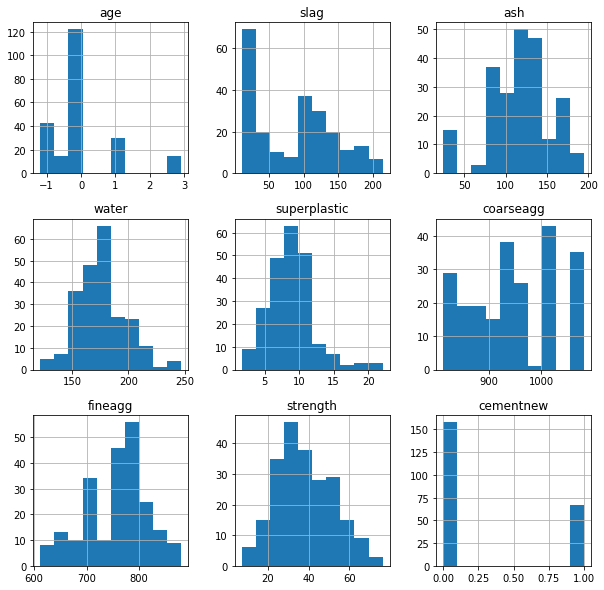

In [19]:
p = df_final.hist(figsize = (10,10))

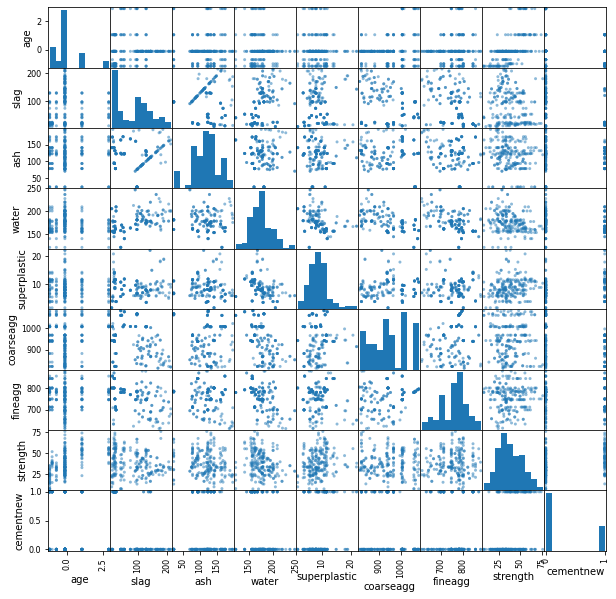

In [20]:
# mengimport library plotting dalam bentuk matriks
from pandas.plotting import scatter_matrix
p = scatter_matrix(df_final,figsize=(10, 10))

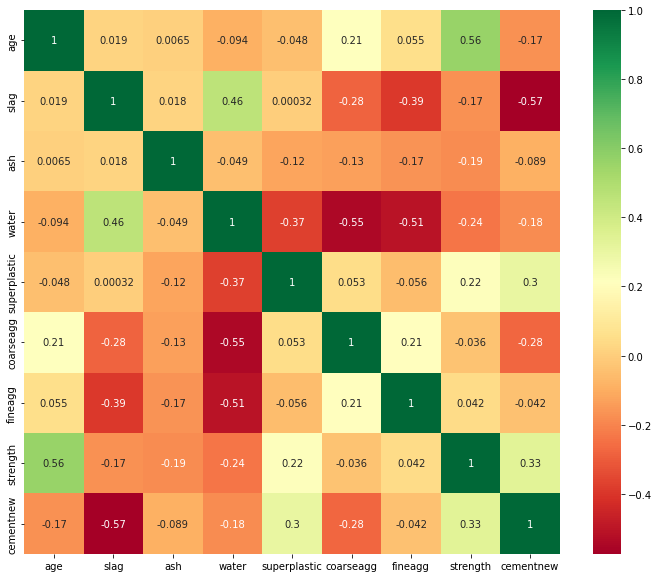

In [21]:
# membuat visualisasi korelasi data dengan heatmap
plt.figure(figsize=(12,10))
p = sns.heatmap(df_final.corr(), annot=True,cmap ='RdYlGn')

Proses Modelling dengan KNN

In [22]:
# menampilkan lima dataset awal yang akan digunakan
df_final.head(5)

,age,slag,ash,water,superplastic,coarseagg,fineagg,strength,cementnew
0,-0.720253,42.2,124.3,158.3,10.8,1080.8,796.2,23.51,0
1,-0.129574,184.0,143.0,194.0,9.0,880.0,699.0,28.99,0
2,-0.129574,178.1,138.7,167.5,18.3,944.0,694.6,36.35,0
3,-0.129574,187.0,195.0,185.0,7.0,898.0,636.0,23.89,0
4,2.908201,98.1,24.5,181.7,6.7,1066.0,785.5,49.97,0


In [23]:
## memisahkan data fitur dengan label yang akan di pelajari
train_data = df_final.drop("cementnew",axis = 1)
train_data.head()

,age,slag,ash,water,superplastic,coarseagg,fineagg,strength
0,-0.720253,42.2,124.3,158.3,10.8,1080.8,796.2,23.51
1,-0.129574,184.0,143.0,194.0,9.0,880.0,699.0,28.99
2,-0.129574,178.1,138.7,167.5,18.3,944.0,694.6,36.35
3,-0.129574,187.0,195.0,185.0,7.0,898.0,636.0,23.89
4,2.908201,98.1,24.5,181.7,6.7,1066.0,785.5,49.97


In [24]:
## memisahkan data label dengan label yang akan di pelajari
df_final.cementnew = df_final.cementnew.astype(np.int64)
label_data = df_final.cementnew
label_data.head()

0    0
1    0
2    0
3    0
4    0
Name: cementnew, dtype: int64

In [25]:
# mengimport library train-test-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_data,label_data,test_size=0.4,random_state=42)

Nilai k KNN yang optimal adalah 1
Skor optimalnya adalah 1.00


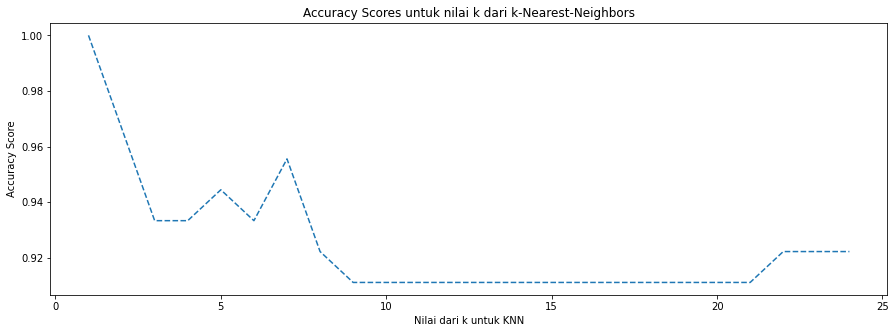

In [26]:
# mengimport library model KNN dengan alias/as 'KNeighborsClassifier'
from sklearn.neighbors import KNeighborsClassifier 
import sklearn.metrics as metrics
# membuat variabel kosong untuk menyimpan metrik KNN/KNN metrics
scores=[]
# kita coba nilai k yang berbeda untuk KNN (dari k=1 sampai k=26)
lrange=list(range(1,25))
# loop proses KNN
for k in lrange:
  # masukkan nilai k dan ukuran 'jarak'
  knn=KNeighborsClassifier(n_neighbors=k)
  # masukkan data train/ data latih untuk melatih KNN
  knn.fit(X_train,y_train.ravel())
  # mmelihat prediksi KNN dengan memasukkan data uji/data test
  y_pred=knn.predict(X_test)
  # menambahkan performance metric akurasi
  scores.append(metrics.accuracy_score(y_test,y_pred))
plt.figure(2,figsize=(15,5))


optimal_k = lrange[scores.index(max(scores))]
print("Nilai k KNN yang optimal adalah %d" % optimal_k)
print("Skor optimalnya adalah %.2f" % max(scores))


# plot hasilnya
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Nilai dari k untuk KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores untuk nilai k dari k-Nearest-Neighbors')
plt.show()

In [27]:
knn = KNeighborsClassifier(13)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9111111111111111

## 2. Pada hasil diagram heatmap, terlihat banyak konfigurasi warna dan nilai yang ditampilkan. Jelaskan arti kolom berwarna merah pada hasil diagram heatmap yang dihasilkan! Pasangan variabel apa saja yang bernilai merah?

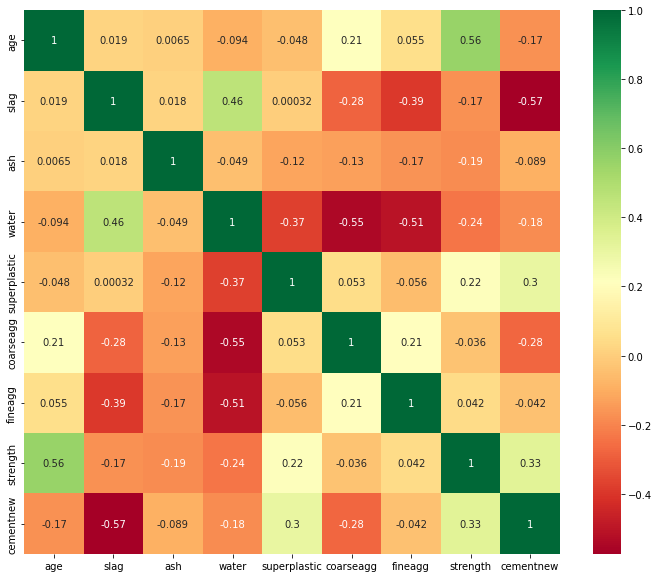

In [28]:
# membuat visualisasi korelasi data dengan heatmap
plt.figure(figsize=(12,10))
p = sns.heatmap(df_final.corr(), annot=True,cmap ='RdYlGn')

1 = keterhubungan kuat positif<br>
-1 = keterhubungan kuat bertolak belakang

Arti kolom warna merah pada hasil diagram hitmap ialah menunjukan semakin merah warnanya semakin berketerhubungan sangat kuat bertolak belakang<br>

Pasangan variabel berwarna merah ialah : 

*  kolom `cementnew` dan `slag`
*  kolom `water` dan `fineagg`
*  kolom `coarseagg` dan `water`

## 3. Apa yang terjadi jika, nilai test set diganti menjadi 0.3 kemudian 0.2 dan 0,1 ?

nilai test set jadi 0.3

In [29]:
# mengimport library train-test-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_data,label_data,test_size=0.3,random_state=42)

Nilai k KNN yang optimal adalah 1
Skor optimalnya adalah 1.00


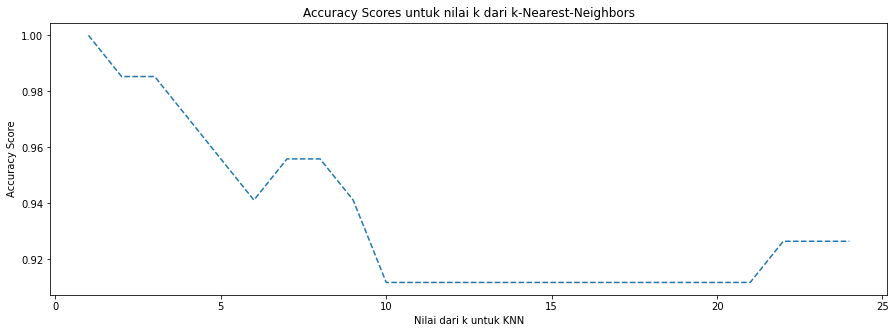

In [30]:
# import library model KNN dengan alias/as 'KNeighborsClassifier'
from sklearn.neighbors import KNeighborsClassifier 
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# buat variabel kosong untuk menyimpan metrik KNN/KNN metrics
scores=[]
# Kita coba nilai k yang berbeda untuk KNN (dari k=1 sampai k=26)
lrange=list(range(1,25))
# loop proses KNN
for k in lrange:
  # masukkan nilai k dan ukuran 'jarak'
  knn=KNeighborsClassifier(n_neighbors=k)
  # masukan data train/ data latih untuk melatih KNN
  knn.fit(X_train,y_train.ravel())
  # lihat prediksi KNN dengan memasukkan data uji/data test
  y_pred=knn.predict(X_test)
  # tambahkan performance metric akurasi
  scores.append(metrics.accuracy_score(y_test,y_pred))
plt.figure(2,figsize=(15,5))


optimal_k = lrange[scores.index(max(scores))]
print("Nilai k KNN yang optimal adalah %d" % optimal_k)
print("Skor optimalnya adalah %.2f" % max(scores))


# plot hasilnya
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Nilai dari k untuk KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores untuk nilai k dari k-Nearest-Neighbors')
plt.show()

In [31]:
knn = KNeighborsClassifier(13)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9117647058823529

Nilai test set menjadi 0.2

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_data,label_data,test_size=0.2,random_state=42)

Nilai k KNN yang optimal adalah 1
Skor optimalnya adalah 1.00


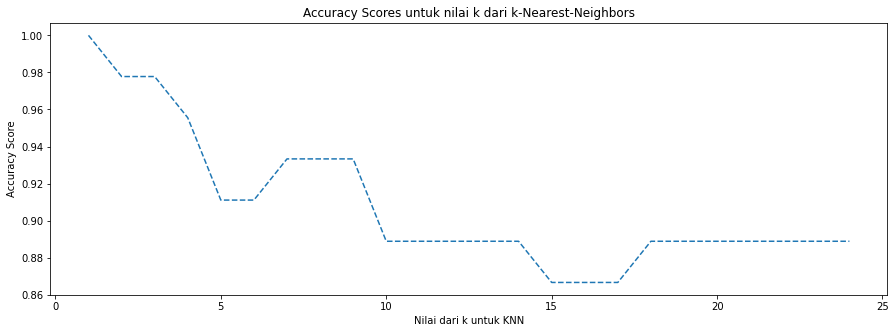

In [33]:
# import library model KNN dengan alias/as 'KNeighborsClassifier'
from sklearn.neighbors import KNeighborsClassifier 
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# buat variabel kosong untuk menyimpan metrik KNN/KNN metrics
scores=[]
# Kita coba nilai k yang berbeda untuk KNN (dari k=1 sampai k=26)
lrange=list(range(1,25))
# loop proses KNN
for k in lrange:
  # masukkan nilai k dan ukuran 'jarak'
  knn=KNeighborsClassifier(n_neighbors=k)
  # masukan data train/ data latih untuk melatih KNN
  knn.fit(X_train,y_train.ravel())
  # lihat prediksi KNN dengan memasukkan data uji/data test
  y_pred=knn.predict(X_test)
  # tambahkan performance metric akurasi
  scores.append(metrics.accuracy_score(y_test,y_pred))
plt.figure(2,figsize=(15,5))


optimal_k = lrange[scores.index(max(scores))]
print("Nilai k KNN yang optimal adalah %d" % optimal_k)
print("Skor optimalnya adalah %.2f" % max(scores))


# plot hasilnya
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Nilai dari k untuk KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores untuk nilai k dari k-Nearest-Neighbors')
plt.show()

In [34]:
knn = KNeighborsClassifier(13)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8888888888888888

Nilai test set menjadi 0.1

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_data,label_data,test_size=0.1,random_state=42)

Nilai k KNN yang optimal adalah 1
Skor optimalnya adalah 1.00


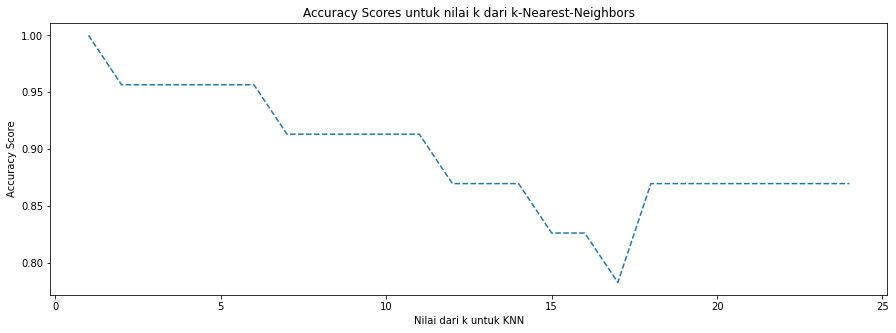

In [36]:
# mengimport library model KNN dengan alias/as 'KNeighborsClassifier'
from sklearn.neighbors import KNeighborsClassifier 
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# membuat variabel kosong untuk menyimpan metrik KNN/KNN metrics
scores=[]
# kita coba nilai k yang berbeda untuk KNN (dari k=1 sampai k=26)
lrange=list(range(1,25))
# loop proses KNN
for k in lrange:
  # masukkan nilai k dan ukuran 'jarak'
  knn=KNeighborsClassifier(n_neighbors=k)
  # masukan data train/ data latih untuk melatih KNN
  knn.fit(X_train,y_train.ravel())
  # melihat prediksi KNN dengan memasukkan data uji/data test
  y_pred=knn.predict(X_test)
  # menambahkan performance metric akurasi
  scores.append(metrics.accuracy_score(y_test,y_pred))
plt.figure(2,figsize=(15,5))


optimal_k = lrange[scores.index(max(scores))]
print("Nilai k KNN yang optimal adalah %d" % optimal_k)
print("Skor optimalnya adalah %.2f" % max(scores))


# plot hasilnya
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Nilai dari k untuk KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores untuk nilai k dari k-Nearest-Neighbors')
plt.show()

In [37]:
knn = KNeighborsClassifier(13)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8695652173913043

## 4. Buatlah tabel yang berisi hasil pengujian Anda dan sertakan berapa nilai k dan nilai akurasi untuk masing-masing skenario uji.

In [38]:
example = {"data test set 0.1": [1,0.8695652173913043],
           "data test set 0.2": [1,0.8888888888888888],
           "data test set 0.3": [1,0.9117647058823529],
           "data test set 0.4": [1,0.9111111111111111]}
dfscenario = pd.DataFrame(example,index=['Nilai k',"Nilai Akurasi"])
dfscenario.head()

,data test set 0.1,data test set 0.2,data test set 0.3,data test set 0.4
Nilai k,1.000000,1.000000,1.000000,1.000000
Nilai Akurasi,0.869565,0.888889,0.911765,0.911111


## 5. Apakah terjadi perbedaan nilai akurasi model? Jika Ya, jelaskan pendapat Anda mengapa hal tersebut bisa terjadi.

Iya terdapat perbedaan nilai akurasi model, Karena pada tiap-tiap model per data test set yang berbeda beda tersebut mempengaruhi nilai akurasi pada tiap model per data test setnya. Jika dilihat pada tabel hasil pengujian dapat disimpulkan bahwa semakin besar nilai data test setnya semakin besar juga nilai akurasinya.

## 6. Berapa nilai presisi dan recall dari masing-masing model yang Anda coba serta jelaskan arti dari nilai tersebut.

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_data,label_data,test_size=0.1,random_state=42)

Text(0.5, 15.0, 'Predicted label')

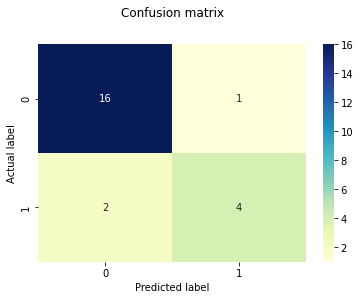

In [40]:
# megimport library model KNN dengan alias/as 'KNeighborsClassifier'
from sklearn.neighbors import KNeighborsClassifier 
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# membuat variabel kosong untuk menyimpan metrik KNN/KNN metrics
scores=[]
# kita coba nilai k yang berbeda untuk KNN (dari k=1 sampai k=26)
lrange=list(range(1,25))
# loop proses KNN
for k in lrange:
  # masukkan nilai k dan ukuran 'jarak'
  knn=KNeighborsClassifier(n_neighbors=k)
  # masukan data train/ data latih untuk melatih KNN
  knn.fit(X_train,y_train.ravel())
  # lihat prediksi KNN dengan memasukkan data uji/data test
  y_pred=knn.predict(X_test)
  # tambahkan performance metric akurasi
  scores.append(metrics.accuracy_score(y_test,y_pred))

y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [41]:
# mengimport classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.80      0.67      0.73         6

    accuracy                           0.87        23
   macro avg       0.84      0.80      0.82        23
weighted avg       0.87      0.87      0.87        23



Dapat disimpulkan bahwa
*   Nilai precision, recall dan f1-score pada kelas 0 lebih besar dari pada kelas 1. 
*   Model yang dibangun, baik untuk mendeteksi kelas 0 karena data yang terdeteksi lebih banyak dari pada data kelas 1 sehingga tidak mengherankan nilai precision dan recall kelas 0 lebih tinggi dari pada kelas 1
*   Memiliki nilai accuracy 0.87





Evaluasi Hasil Matriks data test set 0.2

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_data,label_data,test_size=0.2,random_state=42)

Text(0.5, 15.0, 'Predicted label')

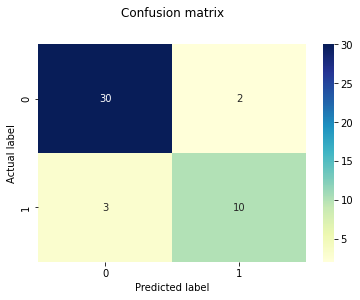

In [43]:
# megimport library model KNN dengan alias/as 'KNeighborsClassifier'
from sklearn.neighbors import KNeighborsClassifier 
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# membuat variabel kosong untuk menyimpan metrik KNN/KNN metrics
scores=[]
# kita coba nilai k yang berbeda untuk KNN (dari k=1 sampai k=26)
lrange=list(range(1,25))
# loop proses KNN
for k in lrange:
  # masukkan nilai k dan ukuran 'jarak'
  knn=KNeighborsClassifier(n_neighbors=k)
  # masukan data train/ data latih untuk melatih KNN
  knn.fit(X_train,y_train.ravel())
  # lihat prediksi KNN dengan memasukkan data uji/data test
  y_pred=knn.predict(X_test)
  # tambahkan performance metric akurasi
  scores.append(metrics.accuracy_score(y_test,y_pred))

y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [44]:
# mengimport classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        32
           1       0.83      0.77      0.80        13

    accuracy                           0.89        45
   macro avg       0.87      0.85      0.86        45
weighted avg       0.89      0.89      0.89        45



Dapat disimpulkan bahwa
*   Nilai precision, recall dan f1-score pada kelas 0 lebih besar dari pada kelas 1. 
*   Model yang dibangun, baik untuk mendeteksi kelas 0 karena data yang terdeteksi lebih banyak dari pada data kelas 1 sehingga tidak mengherankan nilai precision dan recall kelas 0 lebih tinggi dari pada kelas 1
*   Memiliki nilai accuracy 0.89





Evaluasi Hasil Matriks data test set 0.3

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_data,label_data,test_size=0.3,random_state=42)

Text(0.5, 15.0, 'Predicted label')

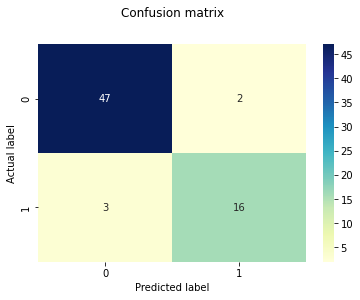

In [46]:
# megimport library model KNN dengan alias/as 'KNeighborsClassifier'
from sklearn.neighbors import KNeighborsClassifier 
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# membuat variabel kosong untuk menyimpan metrik KNN/KNN metrics
scores=[]
# kita coba nilai k yang berbeda untuk KNN (dari k=1 sampai k=26)
lrange=list(range(1,25))
# loop proses KNN
for k in lrange:
  # masukkan nilai k dan ukuran 'jarak'
  knn=KNeighborsClassifier(n_neighbors=k)
  # masukan data train/ data latih untuk melatih KNN
  knn.fit(X_train,y_train.ravel())
  # lihat prediksi KNN dengan memasukkan data uji/data test
  y_pred=knn.predict(X_test)
  # tambahkan performance metric akurasi
  scores.append(metrics.accuracy_score(y_test,y_pred))

y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
# mengimport classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        49
           1       0.89      0.84      0.86        19

    accuracy                           0.93        68
   macro avg       0.91      0.90      0.91        68
weighted avg       0.93      0.93      0.93        68



Dapat disimpulkan bahwa
*   Nilai precision, recall dan f1-score pada kelas 0 lebih besar dari pada kelas 1. 
*   Model yang dibangun, baik untuk mendeteksi kelas 0 karena data yang terdeteksi lebih banyak dari pada data kelas 1 sehingga tidak mengherankan nilai precision dan recall kelas 0 lebih tinggi dari pada kelas 1
*   Memiliki nilai accuracy 0.93





Evaluasi Hasil Matriks data test set 0.4

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_data,label_data,test_size=0.4,random_state=42)

Text(0.5, 15.0, 'Predicted label')

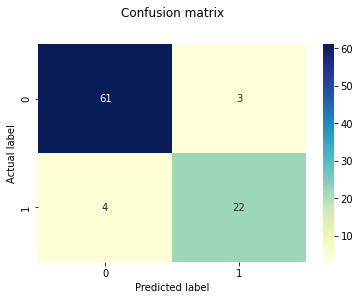

In [49]:
# megimport library model KNN dengan alias/as 'KNeighborsClassifier'
from sklearn.neighbors import KNeighborsClassifier 
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# membuat variabel kosong untuk menyimpan metrik KNN/KNN metrics
scores=[]
# kita coba nilai k yang berbeda untuk KNN (dari k=1 sampai k=26)
lrange=list(range(1,25))
# loop proses KNN
for k in lrange:
  # masukkan nilai k dan ukuran 'jarak'
  knn=KNeighborsClassifier(n_neighbors=k)
  # masukan data train/ data latih untuk melatih KNN
  knn.fit(X_train,y_train.ravel())
  # lihat prediksi KNN dengan memasukkan data uji/data test
  y_pred=knn.predict(X_test)
  # tambahkan performance metric akurasi
  scores.append(metrics.accuracy_score(y_test,y_pred))

y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [50]:
# mengimport classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95        64
           1       0.88      0.85      0.86        26

    accuracy                           0.92        90
   macro avg       0.91      0.90      0.90        90
weighted avg       0.92      0.92      0.92        90



Dapat disimpulkan bahwa
*   Nilai precision, recall dan f1-score pada kelas 0 lebih besar dari pada kelas 1. 
*   Model yang dibangun, baik untuk mendeteksi kelas 0 karena data yang terdeteksi lebih banyak dari pada data kelas 1 sehingga tidak mengherankan nilai precision dan recall kelas 0 lebih tinggi dari pada kelas 1
*   Memiliki nilai accuracy 0.92



